# **Ejercicio Práctico del Bootcamp en Data Science.**

In [ ]:
import numpy as np
import pandas as pd

**Descripción de los Datos:**

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Conociendo la información**

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BootCamp DataScience/train.csv')
titanic_df = pd.DataFrame(titanic_df)
titanic_df = titanic_df.dropna()
titanic_df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


**Información del DataFrame**

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**Columnas del DataFrame**

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.columns.size

12

Cambiando Columnas

In [ ]:
spanish_columns = ['idPasajero', 'Sobreviviente', 'Clase', 'Nombre', 'Sexo', 'Edad', 'Parientes/Esposo(a)',
       'ParientesHijos', 'Boleto', 'Tarifa', 'Cabina', 'PuertoEmbarque']

In [ ]:
titanic_df.columns = spanish_columns

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPasajero           183 non-null    int64  
 1   Sobreviviente        183 non-null    int64  
 2   Clase                183 non-null    int64  
 3   Nombre               183 non-null    object 
 4   Sexo                 183 non-null    object 
 5   Edad                 183 non-null    float64
 6   Parientes/Esposo(a)  183 non-null    int64  
 7   ParientesHijos       183 non-null    int64  
 8   Boleto               183 non-null    object 
 9   Tarifa               183 non-null    float64
 10  Cabina               183 non-null    object 
 11  PuertoEmbarque       183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**Medianas**

In [ ]:
mediana = titanic_df.Tarifa.index.size
np.sort(titanic_df.Tarifa)[mediana // 2]

57.0

In [ ]:
titanic_df.loc[:,["Edad", "Tarifa", "Clase"]].describe(percentiles=[0.5]).loc["50%",:]

Edad      36.0
Tarifa    57.0
Clase      1.0
Name: 50%, dtype: float64

**Supervivientes**

In [ ]:
survives = titanic_df.groupby('Sobreviviente').count()
survives.idPasajero

Sobreviviente
0     60
1    123
Name: idPasajero, dtype: int64

In [ ]:
male_survivor = titanic_df.loc[(titanic_df.Sexo == "male") & (titanic_df.Sobreviviente == 1)]
male_survivor

,idPasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Parientes/Esposo(a),ParientesHijos,Boleto,Tarifa,Cabina,PuertoEmbarque
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.00,1,0,19943,90.0000,C93,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S


In [ ]:
female_survivor = titanic_df.loc[(titanic_df.Sexo == "female") & (titanic_df.Sobreviviente == 1)]
female_survivor

,idPasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Parientes/Esposo(a),ParientesHijos,Boleto,Tarifa,Cabina,PuertoEmbarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


**Estadística Descriptiva UNIVARIANTES**

In [ ]:
titanic_df.describe()

,idPasajero,Sobreviviente,Clase,Edad,Parientes/Esposo(a),ParientesHijos,Tarifa
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


**Gráficos**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

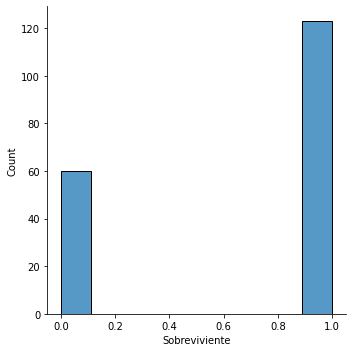

In [ ]:
sns.displot(titanic_df, x="Sobreviviente")
plt.show()

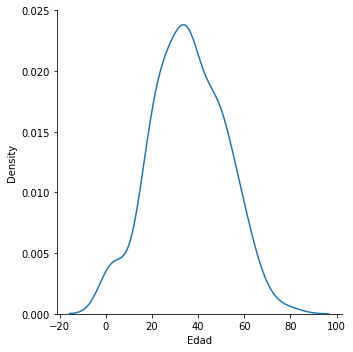

In [ ]:
sns.displot(titanic_df, x="Edad", kind="kde")
plt.show()

**Medida de Dispersión**

In [ ]:
titanic_df.Tarifa.values.var()

5797.140663776353

**Estadísticas Multivariantes**

**Correlación:**

In [ ]:
np.corrcoef(titanic_df.Edad, titanic_df.Sobreviviente)

array([[ 1.        , -0.25408475],
       [-0.25408475,  1.        ]])

**Comparación: **

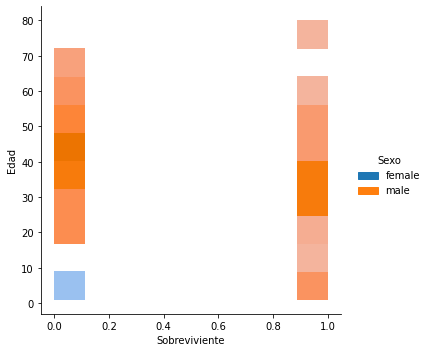

In [ ]:
sns.displot(titanic_df, x="Sobreviviente", y="Edad", hue="Sexo")
plt.show()

In [ ]:
passengers_per_age = titanic_df["Edad"].value_counts(sort=False).sort_index()
passengers_per_age

0.92     1
1.00     1
2.00     3
3.00     1
4.00     3
        ..
64.00    1
65.00    2
70.00    1
71.00    1
80.00    1
Name: Edad, Length: 63, dtype: int64

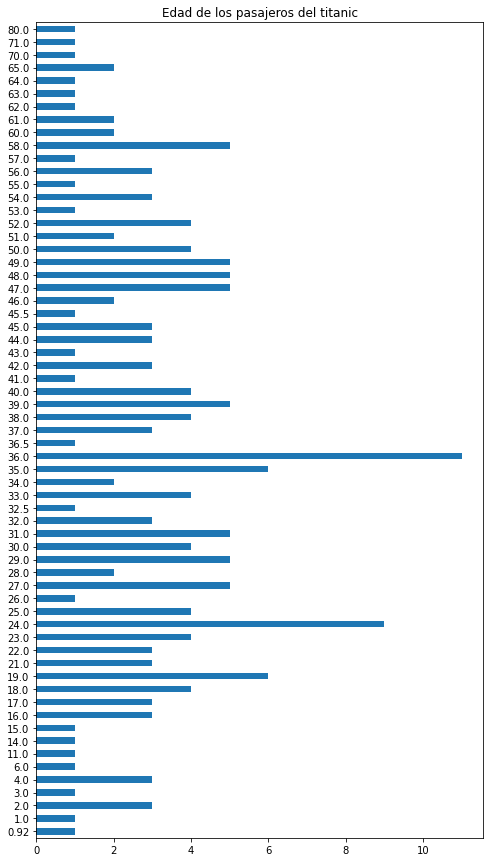

In [ ]:
passengers_per_age_bar = passengers_per_age.plot(kind="barh", y="Edad", legend=False, figsize=(8,15))
passengers_per_age_bar.set_title("Edad de los pasajeros del titanic")
plt.show()

In [ ]:
titanic_df.Sexo = titanic_df.Sexo.map({'male': 0,'female': 1})

**Tabla Pivote**

In [ ]:
titanic_p_t = titanic_df.pivot_table(
    index="Sobreviviente",
    values=["Edad", "Clase", "Tarifa", "Sexo"],
    aggfunc="mean",
)
titanic_p_t

,Clase,Edad,Sexo,Tarifa
Sobreviviente,,,,
0,1.216667,41.350000,0.100000,64.048262
1,1.178862,32.905854,0.666667,85.821107


In [ ]:
titanic_df.melt(id_vars="Sexo")

,Sexo,variable,value
0,1,idPasajero,2
1,1,idPasajero,4
2,0,idPasajero,7
3,1,idPasajero,11
4,1,idPasajero,12
...,...,...,...
2008,1,PuertoEmbarque,S
2009,0,PuertoEmbarque,S
2010,1,PuertoEmbarque,C
2011,1,PuertoEmbarque,S


# **Visualización de Datos con Altair**

In [ ]:
import altair as alt
#from vega_datasets import data as vega_data
#data = vega_data.gapminder()

In [ ]:
titanic_df.head()

,idPasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Parientes/Esposo(a),ParientesHijos,Boleto,Tarifa,Cabina,PuertoEmbarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [ ]:
titanic_df.shape

(183, 12)

In [ ]:
survivors = titanic_df[titanic_df.Sobreviviente == 1]
survivors.Tarifa.unique()

array([ 71.2833,  53.1   ,  16.7   ,  26.55  ,  13.    ,  35.5   ,
        76.7292,  10.5   , 263.    ,  63.3583,  26.2833,  66.6   ,
        39.    ,  26.    ,  27.7208, 146.5208,  31.    , 113.275 ,
        76.2917,  90.    ,  83.475 ,  52.5542,  86.5   , 153.4625,
       135.6333,  77.9583,  91.0792, 247.5208, 151.55  , 108.9   ,
        56.9292,  83.1583, 262.375 , 164.8667, 134.5   ,  57.9792,
        55.    ,  75.25  ,  69.3   ,  55.4417, 120.    ,   8.05  ,
        81.8583,  30.5   ,  89.1042,  13.7917,  78.2667,  26.2875,
        93.5   ,  49.5   ,  71.    , 110.8833,  39.6   ,  79.65  ,
        51.4792,  26.3875,  55.9   ,  79.2   ,  30.    , 512.3292,
       211.3375,  57.    , 227.525 ,  49.5042,  52.    ,  12.475 ,
        25.9292,  39.4   ])

***Creando DataFrame de Medias con sobrevivientes por edad***

In [ ]:
survivor_by_age = survivors.groupby('Edad').count().reset_index()
survivor_by_age.head(5)

,Edad,idPasajero,Sobreviviente,Clase,Nombre,Sexo,Parientes/Esposo(a),ParientesHijos,Boleto,Tarifa,Cabina,PuertoEmbarque
0,0.92,1,1,1,1,1,1,1,1,1,1,1
1,1.00,1,1,1,1,1,1,1,1,1,1,1
2,2.00,1,1,1,1,1,1,1,1,1,1,1
3,3.00,1,1,1,1,1,1,1,1,1,1,1
4,4.00,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
passengers_by_age = titanic_df.groupby('Edad').count().reset_index()
passengers_by_age

,Edad,idPasajero,Sobreviviente,Clase,Nombre,Sexo,Parientes/Esposo(a),ParientesHijos,Boleto,Tarifa,Cabina,PuertoEmbarque
0,0.92,1,1,1,1,1,1,1,1,1,1,1
1,1.00,1,1,1,1,1,1,1,1,1,1,1
2,2.00,3,3,3,3,3,3,3,3,3,3,3
3,3.00,1,1,1,1,1,1,1,1,1,1,1
4,4.00,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
58,64.00,1,1,1,1,1,1,1,1,1,1,1
59,65.00,2,2,2,2,2,2,2,2,2,2,2
60,70.00,1,1,1,1,1,1,1,1,1,1,1
61,71.00,1,1,1,1,1,1,1,1,1,1,1


**Barras**

In [ ]:
alt.Chart(survivor_by_age).mark_bar().encode(
    x = 'Edad',
    y = 'Sobreviviente',
)

alt.Chart(...)

In [ ]:
alt.Chart(passengers_by_age).mark_bar().encode(
    x = 'Edad',
    y = 'Nombre',
)

alt.Chart(...)

**Barras+**

Creando gráfico básico

In [ ]:
bars = alt.Chart(survivor_by_age).mark_bar(color='#227788').encode(
    x = alt.X('Edad:O', title='Edad de Supervivientes', axis=alt.Axis(format = 'd', labelAngle=0)),
    y = alt.Y('Sobreviviente:Q', title='Supervivientes', axis=alt.Axis(labels=False)),
)

bars

alt.Chart(...)

Creando Gráfico de Labels

In [ ]:

labels = bars.mark_text(baseline='bottom').encode(
    text = alt.Text('Sobreviviente:Q'),
)
labels

alt.Chart(...)

Uniendo los dos gráficos como layers

In [ ]:
grafico_final = bars + labels

grafico_final.properties(
    title = 'Número de supervivientes por Edad',
    width = 1200,
    height = 450,
).configure_title(
    fontSize = 25,
    anchor = 'start',
).configure_axis(
    grid = False,
).configure_view(
    strokeWidth = 0,
)

alt.LayerChart(...)

**Lineal**

In [ ]:
alt.Chart(survivor_by_age).mark_line().encode(
    x = alt.X("Edad"),
    y = alt.Y("Tarifa"),
)

alt.Chart(...)

# **Gráficos Complejos**

Gráfico 1

In [ ]:
complex_bars_1 = alt.Chart(passengers_by_age).mark_bar(color='red').encode(
    x = alt.X('Edad:O', title='Edad de Supervivientes', axis=alt.Axis(format = 'd', labelAngle=0)),
    y = alt.Y('Nombre:Q', title='Pasajeros', axis=alt.Axis()),
)

complex_bars_1

alt.Chart(...)

Gráfico 2

In [ ]:
complex_bars_2 = alt.Chart(survivor_by_age).mark_bar(color='green').encode(
    x = alt.X('Edad:O', title='Edad de Supervivientes', axis=alt.Axis(format = 'd', labelAngle=0)),
    y = alt.Y('Sobreviviente:Q', title='Supervivientes'),
)

complex_bars_2

alt.Chart(...)

Gráficos en capas

In [ ]:
complex_graph = complex_bars_1 + complex_bars_2

complex_graph

alt.LayerChart(...)

Gráficos uno al lado del otro

In [ ]:
complex_aside = complex_bars_1 | complex_bars_2

complex_aside

alt.HConcatChart(...)

Gráficos uno arriba del otro

In [ ]:
complex_above = complex_bars_1 & complex_bars_2

complex_above

alt.VConcatChart(...)

# **Facetas**

In [ ]:
alt.Chart(titanic_df).mark_bar(color='#227788').encode(
    x = alt.X('Edad:O'),
    y = alt.Y('count(Sobreviviente):Q'),
    #esta es faceta
    column = 'Clase',
    tooltip = 'Edad',
).configure_title(
    fontSize = 25,
    anchor = 'start',
).configure_axis(
    grid = False,
).configure_view(
    strokeWidth = 0,
    width = 340,
)

alt.Chart(...)